In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv('/kaggle/input/salessuperstore/supermarket_sales - Sheet1.csv')

In [4]:
file.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#NO missing values in the dataset we can proceed to verify duplicates value 

file.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<Figure size 1500x800 with 0 Axes>

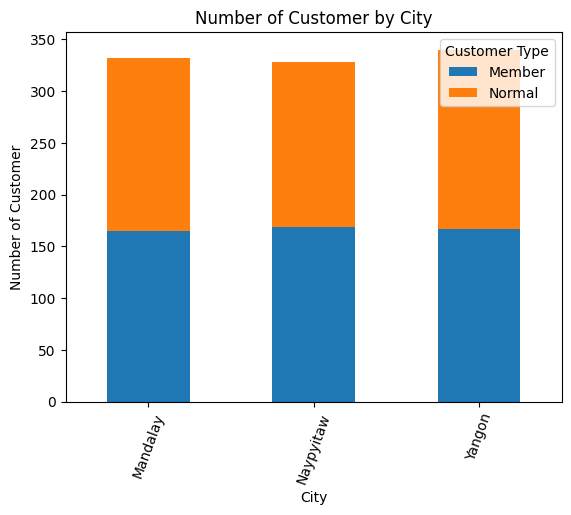

In [7]:
#NO duplicated value 

total_customer_by_City = file.pivot_table(index='City', columns='Customer type', values='Invoice ID', aggfunc='count')
plt.figure(figsize=(15, 8))
total_customer_by_City.plot.bar(stacked=True)
plt.title('Number of Customer by City')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.legend(title='Customer Type')
plt.xticks(rotation=70)
plt.show()


# 1st oservation : The number of customer in all the branch are slightly the same and Member type as well . let now see the comparions with the sex
**

<Figure size 1500x800 with 0 Axes>

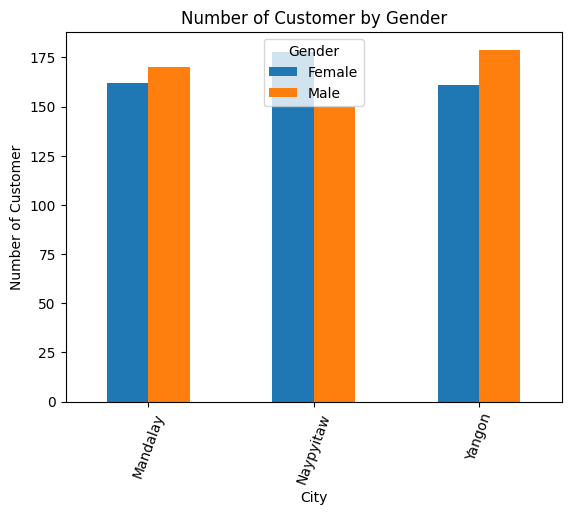

In [9]:
total_customer_by_gender = file.pivot_table(index='City', columns='Gender', values='Invoice ID', aggfunc='count')
plt.figure(figsize=(15, 8))
total_customer_by_gender .plot.bar()
plt.title('Number of Customer by Gender')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.legend(title='Gender')
plt.xticks(rotation=70)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Electronic accessories')])

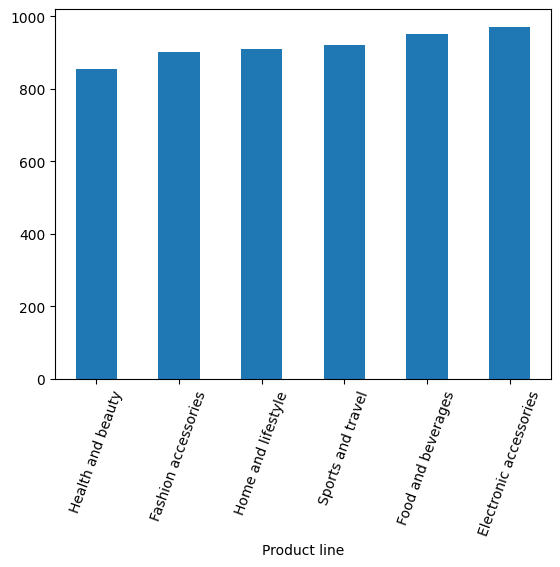

In [10]:
#number of quantiy product sold 
total_product_sold = file.groupby('Product line')['Quantity'].sum().sort_values()
total_product_sold.plot.bar()
plt.xticks(rotation=70)

# Eletrconic Accessories got the highest number of product sold. following by Food and beverage and Sport and Home lifestyle

<Figure size 2000x800 with 0 Axes>

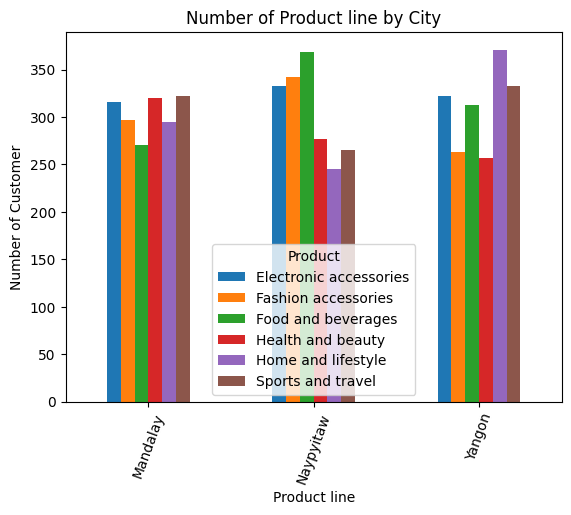

In [11]:
total_product_by_City = file.pivot_table(index='City', columns='Product line', values='Quantity', aggfunc='sum')
plt.figure(figsize=(20, 8))
total_product_by_City .plot.bar()
plt.title('Number of Product line by City')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Product')
plt.xticks(rotation=70)
plt.show()

# Going deeper in the product analysis we can see that food and beverages and fashion are most sold product in Naypytaw city while in yangon Home and lifestyle is the most product sold . In Mandalay we have equalty between Sports ,health and electronic accessories 

<Figure size 1500x800 with 0 Axes>

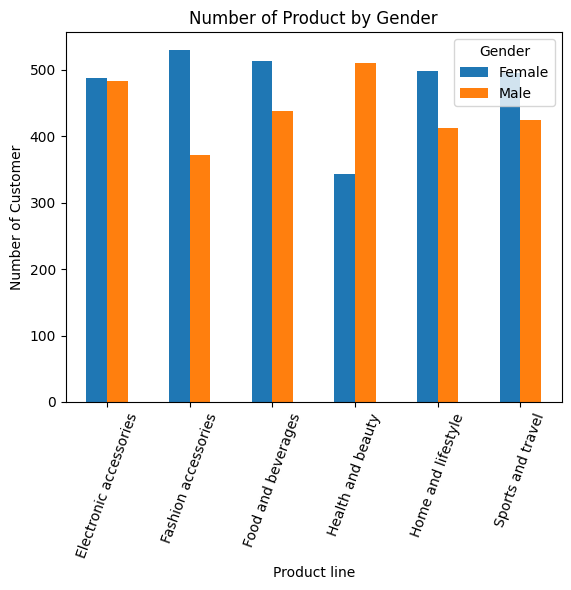

In [12]:
total_product_by_gender = file.pivot_table(index='Product line', columns='Gender', values='Quantity', aggfunc='sum')
plt.figure(figsize=(15, 8))
total_product_by_gender .plot.bar()
plt.title('Number of Product by Gender')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Gender')
plt.xticks(rotation=70)
plt.show()

# trying to cach more details in the product sold , we can see that Women are mostly interreseted in fashion accessories , Food beverage and Home lifestyle. it's an insight as in Napityaw we have more women buying .

<Figure size 2000x800 with 0 Axes>

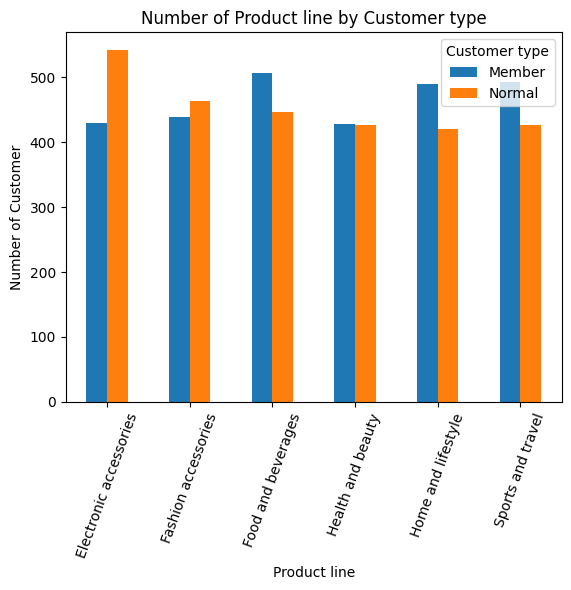

In [13]:
total_product_by_customer_type = file.pivot_table(index='Product line', columns='Customer type', values='Quantity', aggfunc='sum')
plt.figure(figsize=(20, 8))
total_product_by_customer_type .plot.bar()
plt.title('Number of Product line by Customer type')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Customer type')
plt.xticks(rotation=70)
plt.show()

# we were trying to understand why customer were most interested in some type of product in the city by checking the customer type . the insigth here is that custpmer does not necessary buy a specific product based on their customer type. 

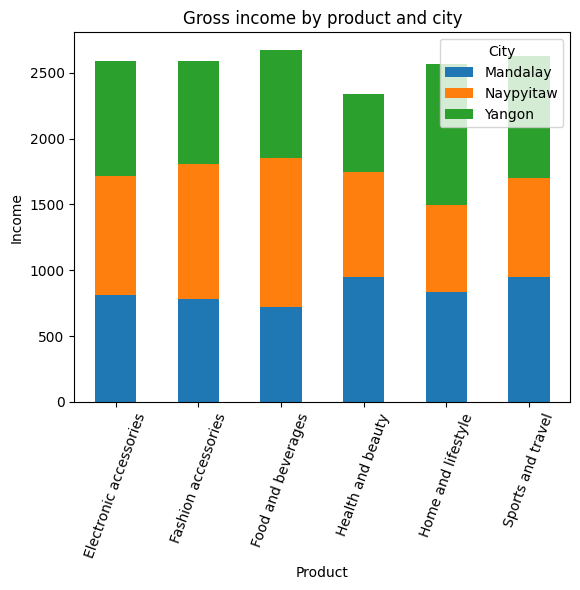

In [14]:
#product by Gross income 


most_income_product = file.groupby(['Product line','City'])['gross income'].sum().unstack()
most_income_product .plot(kind='bar' , stacked=True)
plt.title('Gross income by product and city')
plt.xlabel('Product')
plt.ylabel('Income')
plt.legend(title='City')
plt.xticks(rotation=70)
plt.show()

# Without a suprise Napyitwa is the most valuable branch 

(array([0, 1, 2]),
 [Text(0, 0, 'Credit card'), Text(1, 0, 'Cash'), Text(2, 0, 'Ewallet')])

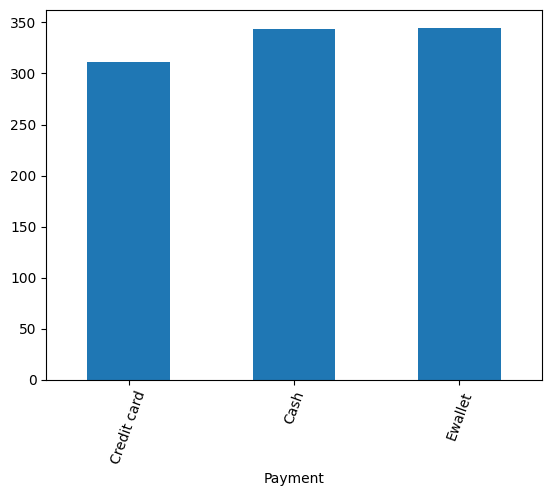

In [15]:
#most used payment method 


most_payment_method_used = file.groupby('Payment')['Invoice ID'].count().sort_values()
most_payment_method_used.plot.bar()
plt.xticks(rotation=70)

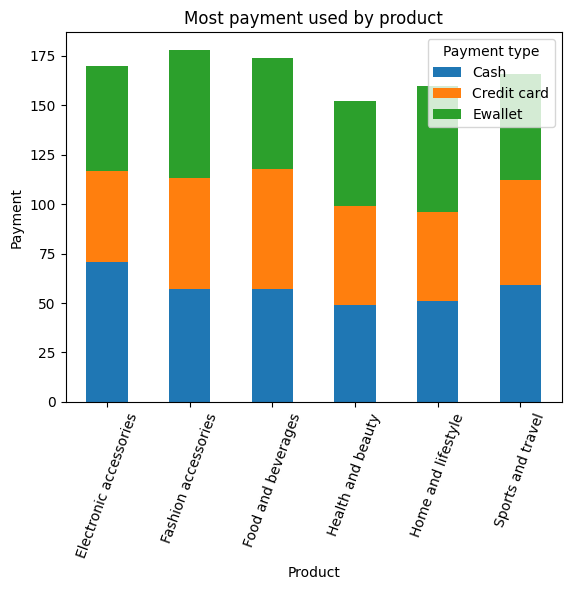

In [16]:
#Payment method by product line 

most_payment_method_by_product = file.groupby(['Product line','Payment'])['Invoice ID'].count().unstack()
most_payment_method_by_product.plot(kind='bar',stacked=True)
plt.title('Most payment used by product')
plt.xlabel('Product')
plt.ylabel('Payment')
plt.legend(title='Payment type')
plt.xticks(rotation=70)
plt.show()

# Knowing that customer used mostly their credit card or the Ewallet we wanted to see if the number of product sold were impacted by the payment method . 